# Support Vector Regressor

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_regression

In [2]:
X,y = make_regression(n_samples=1000,n_features=2,n_targets=1,noise=3.0)
X,y

(array([[-1.78799086,  0.31176737],
        [ 1.17343326,  1.82004263],
        [-0.44283511, -0.07868668],
        ...,
        [-0.26829792, -0.49380323],
        [-0.66214081, -0.37078992],
        [-3.38327119,  1.23081648]]),
 array([ 1.13867902e+01,  6.40449867e+01,  6.09343889e-01, -8.99454630e+00,
        -1.15825268e+01,  2.30820739e+01, -1.34985669e+01,  3.96784157e+00,
         3.60541916e+01,  2.73286553e+01,  3.65375340e+01,  7.35498476e+00,
        -3.98560400e+01,  6.91158742e+00,  1.38002222e+01,  2.26520399e+01,
        -1.12602926e+01,  4.98672746e+01,  3.98378052e+01, -7.95000335e+00,
         4.78320827e+01, -2.14905233e+01, -5.34283274e+01, -4.61109345e+01,
        -3.09691649e+01, -2.26829178e+01, -1.31973428e+01,  4.35215528e+01,
         3.70510007e+01, -2.99880331e+01,  2.54159946e+01, -2.21582966e+01,
        -1.33383894e+01, -1.99505652e+01, -1.73583781e+01, -1.16345108e+01,
        -3.17168318e+01,  1.64153289e+01,  1.58462901e+01, -1.96077366e-01,
         

In [3]:
pd.DataFrame(X)[0]

0     -1.787991
1      1.173433
2     -0.442835
3      0.064131
4     -1.437787
         ...   
995   -0.566022
996    0.758906
997   -0.268298
998   -0.662141
999   -3.383271
Name: 0, Length: 1000, dtype: float64

<Axes: xlabel='0', ylabel='1'>

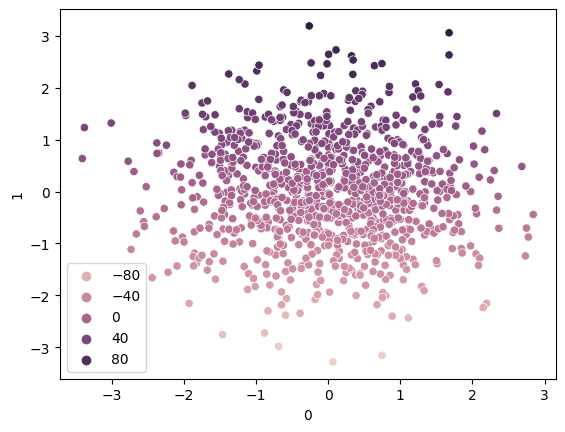

In [4]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=42)

In [7]:
from sklearn.svm import SVR
svr = SVR(kernel='linear')
svr.fit(X_train,y_train)
y_pred = svr.predict(X_test)

In [10]:
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.9910333705196982


### Hyperparameter tuning

In [12]:
from sklearn.model_selection import GridSearchCV
params = {
    'kernel':['linear'],
    'C':[0.1,1,10,100,1000],
    'gamma':[1,0.1,0.01,0.001,0.0001],
    'epsilon':[0.1,0.2,0.3]
}
gridcv = GridSearchCV(SVR(),param_grid=params,cv=5,scoring='neg_mean_squared_error',verbose=3,refit=True)
gridcv.fit(X_train,y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=-17.611 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=-18.124 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=-20.914 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=-19.276 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=-17.478 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=-17.611 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=-18.124 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=-20.914 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=-19.276 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=-17.478 total time=   0.0s
[CV 1/5] END C=0.1

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'epsilon': [0.1, 0.2, 0.3],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             scoring='neg_mean_squared_error', verbose=3)

In [14]:
gridcv.best_params_

{'C': 10, 'epsilon': 0.1, 'gamma': 1, 'kernel': 'linear'}

In [15]:
y_pred_gridcv = gridcv.predict(X_test)
print(r2_score(y_test,y_pred_gridcv))

0.9911520597145277
